<font size = "5"> **[MSE672: Introduction to TEM](https://gduscher.github.io/MSE672-Introduction-to-TEM/)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />


# Electron Optics

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Introduction/CH1_07-Electron_Optics.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Introduction/CH1_07-Electron_Optics.ipynb)
 
part of

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

**Spring 2025**<br>
by Gerd Duscher

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

## Import packages for figures and 
### Check Installed Packages

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

installing pyTEMlib
done


### Load the plotting and figure packages

In [1]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    
import pyTEMlib.animation as animate

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Using kinematic_scattering library version {_version_ }  by G.Duscher


## Transmission Electron Microscope

A TEM is a stack of electro-optical elements:
![TEM](images/Zeiss.png)

- electron source
- electrostatic lens
- accelerator
- magnetic lens
- magnetic and electrostatic deflectors
- magnetic multipoles
- apertures
- detectors (viewing screen,CCD)
- sample holder


### Start screen on the computer of our TEM

![start_screen](images/start_screen.png)

The big buttons on upper left, we saw already in the last notebook.

You select the different modes of the TEM with those.

![TEMmodes.png](images/TEMmodes.png)

## Electron Optics - Overview of the Whole System

We start on the top.

#### The Electron Gun 
The electron gun produces the electrons, focuses them and accelerates
them.

#### The Condenser 
The condenser lens system varies the beam size, the illumination area and the convergence angle.

#### The Objective Lens
The objective lens does the maximum magnification in imaging mode.

#### The Intermediate Lens
The Intermediate lens system switches between imaging and
diffraction mode. The objective lens does not magnify anything in diffraction mode, because the back focal plane of the objective lens is object plane of the intermediate plane. The intermediate lens does the maximum magnification.

#### The Projector Lens 
The projector lens system magnifies everything roughly to the
magnification indicated on the display/chosen on the console.

### Electron Optics - Condenser

The electron optics starts at the cross over which the gun produces in the
differential pumping aperture.
Then we have a condenser lens system with three lenses, three pairs of deflectors, a pair of stigmators and an aperture. 

This allows a very  flexible illumination of the specimen.

### Electron Optics - Projective

The projector lens system in our TEM (Zeiss Libra 200MC) is divided by the electron energy-loss filter into two parts.

The first part switches from imaging to diffraction and does all the magnification. This part has three
lenses, two pairs of deflectors, a stigmator, and an aperture. 

The second part switches from spectroscopy to imaging or diffraction and does only magnification in spectroscopy mode. This part has three lenses, two pairs
of deflectors, a stigmator, and an aperture.

## Electron Optics - Ray Diagrams

To do the optical ray diagram we only have to concern ourselves with the lenses and the apertures.

Deflectors and stigmators (correcting multipoles) are only used to correct for mechanical misalignment of the optical axis.
The correcting multipoles will be discussed in the phase contrast part of this lecture.
The deflectors will be discussed in the STEM part in detail.

### Basic Ray Diagram

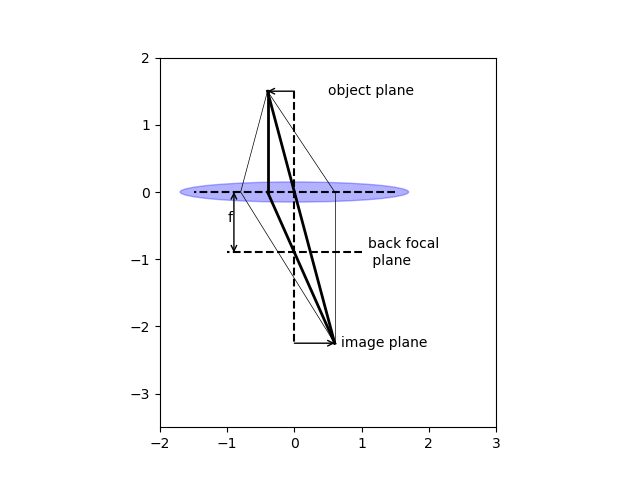

In [4]:
# ---INPUT------ #
focal_length = 0.9
# -------------- #

animate.geometric_ray_diagram(focal_length)


A lens is determined by:
- focal plane
- object plane
- image plane

### Magnification

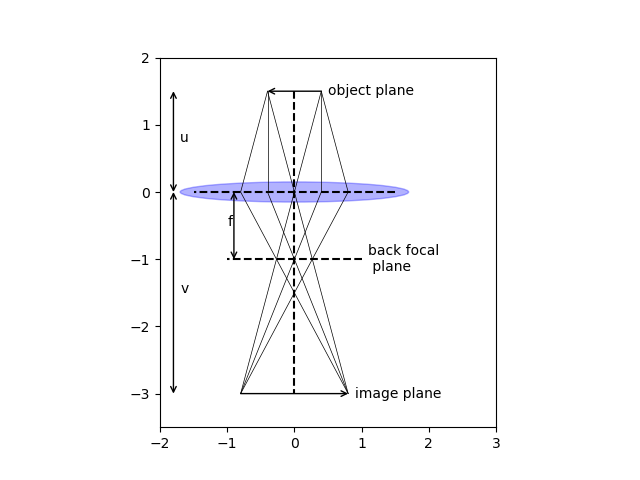

In [5]:
# ---INPUT------ #
focal_length = 1.0
# -------------- #

animate.geometric_ray_diagram(focal_length, magnification=True)

The magnification of a
lens is given by
Newton's law:
$$
\frac{1}{u}+\frac{1}{v} =\frac{1}{f}
$$

The magnification M is defined as
$$ 
M = \frac{v}{u}
$$

### Focus
The microscope consists of a
stack of lenses in which the
image plane of one lens is the
object plane of the next one.

The focal length $f$ of a
magnetic lens can be changed
by its electric current.

If the field is too weak, we call
it underfocus, is it too strong
we speak of overfocus.

![focus](images/focus.png)

### Condenser Ray Diagram
Below is a stack of lenses that is equivalent to the condenser lens system on the Libra 200.

The objective lens focal length is usually not changed (at least not much), and the sample is in the middle of the objective lens system.

Change the ``focal lengths`` parameters so that there the illumination changes from parallel to convergent. 

Tip: do not change the gun (first value), and the objective (last two values) values.

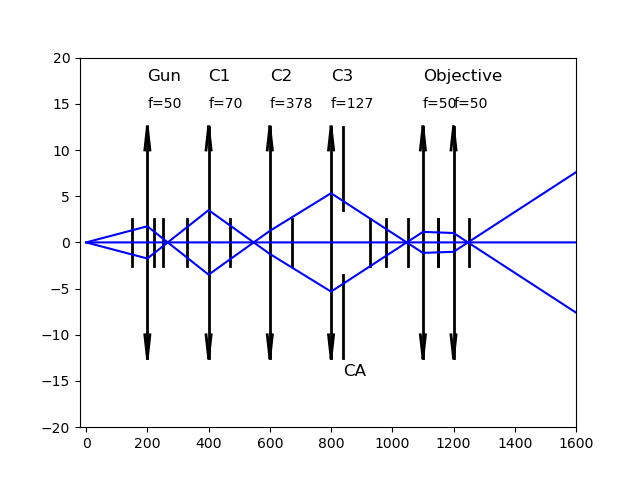

In [13]:
# ------ INPUT ------#
focal_lengths = np.array([60.0, 70.0,  90.0,  100.0 ,  50,  50]) # Köhler Illumination
#--------------------#

# Define lenses here
lens_labels =             ['Gun', 'C1', 'C2', 'C3' , 'Objective', '']
lens_positions = np.array([200.0, 400.0, 600.0, 800.0, 1100,1200    ]) # lens positions
focal_lengths = np.array([60.0, 70.0,  90.0,  100.0 ,  50,  50]) # lens focal lengths for Spot Mode in TEM# focal_lengths = np.array([50.0, 70.0,  90.0,  142.0 ,  50,  50]) # Köhler Illumination
focal_lengths = np.array([50.0, 70.0,  378.0,  127.0 ,  50,  50]) # Slightly convergent


animate.propagate_beam([0,],1,  3, lens_positions, focal_lengths, lens_labels,   'blue')


If you select any mode, magnification or brightness, the computer looks up a dataset and provides the stored values of currents to the respective lenses and other optical elements. 

An engineering alignment determines those values and users only have to deal with the fine-tuning of the electron optical system.

## Convergence Angle

The condensor lens system defines the illumination of the sample and with it the convergence angle (even parallel illumination has ususally a convergence angle of a few $\mu$rad).

The convergence angle is set by the condenser lens system  and  can be measured with a convergent beam electron diffraction (CBED) pattern.


Under plane wave illumination the diffraction pattern consists of points. If you imagine a second incident plane wave
with some angle to the first one, there will be two slightly shifted diffraction patterns made out of points.


A lot of plane waves with a conical angle distribution will result in small circles instead of a point. The radius of the circle corresponds to the convergence angle. One can easily calculate the convergence angle from a CBED pattern of a known sample.

## Summary Ray Optics of TEM
- Lenses provide illumination and magnification
- Lenses switch modes in a TEM
- Lenses allow to select the angles within a TEM
- Apertures help to select the information projected in a TEM

A detailed understanding of the angles within the TEM allows for a
project oriented experimental setup.


## Navigation
- <font size = "3">  **Back  [Overview](CH1_06-Overview.ipynb)** </font>
- <font size = "3">  **Next: [Diffraction](../Diffraction/CH2_00-Diffraction.ipynb)** </font>
- <font size = "3">  **Chapter 1: [Introduction](CH1_00-Introduction.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>

## Appendix:
### Code for condenser stack ray diagram

In [ ]:
# ----------------------------------------------------------------
# Modified from Michael Fairchild :simply draws a thin-lens at the provided location parameters:
#     - z:    location along the optical axis (in mm)
#     - f:    focal length (in mm, can be negative if div. lens)
#     - diam: lens diameter in mm
#     - lens_labels:  label to identify the lens on the drawing
# ----------------------------------------------------------------
def add_lens(z, f, diam, lens_labels):
    """add lens to propagate beam plot"""
    ww, tw, rad = diam / 10.0, diam / 3.0, diam / 2.0
    plt.plot([z, z], [-rad, rad], 'k', linewidth=2)
    plt.plot([z, z + tw], [-rad, -rad + np.sign(f) * ww], 'k', linewidth=2)
    plt.plot([z, z - tw], [-rad, -rad + np.sign(f) * ww], 'k', linewidth=2)
    plt.plot([z, z + tw], [rad, rad - np.sign(f) * ww], 'k', linewidth=2)
    plt.plot([z, z - tw], [rad, rad - np.sign(f) * ww], 'k', linewidth=2)
    plt.plot([z + f, z + f], [-ww, ww], 'k', linewidth=2)
    plt.plot([z - f, z - f], [-ww, ww], 'k', linewidth=2)
    plt.text(z, rad + 5.0, lens_labels, fontsize=12)
    plt.text(z, rad + 2.0, 'f=' + str(int(f)), fontsize=10)


def add_aperture(z, diam, radius, lens_labels):
    """add aperture to propagate beam plot"""

    ww, tw, rad = diam / 10.0, diam / 3.0, diam / 2.0
    radius = radius / 2
    plt.plot([z, z], [-rad, -radius], 'k', linewidth=2)
    plt.plot([z, z], [rad, radius], 'k', linewidth=2)
    plt.text(z, -rad - 2.0, lens_labels, fontsize=12)


def propagate_beam(source_position, numerical_aperture, number_of_rays, lens_positions, focal_lengths,
                   lens_labels='', color='b'):
    """geometrical propagation of light rays from given source

    Parameters
    ----------
    source_position:  list
        location of the source (z0, x0) along and off axis (in mm)
    numerical_aperture:  float
        numerical aperture of the beam (in degrees)
    number_of_rays:  int
        number of rays to trace
    lens_positions:  numpy array
        array with the location of the lenses
    focal_lengths:  numpy array
        array with the focal length of lenses
    lens_labels: list of string
        label for the nature of lenses
    color: str
        color of the rays on plot
    """

    plt.figure()
    z_max = 1600.

    # aperture (maximum angle) in radians
    apa = numerical_aperture * np.pi / 180.0

    for i in range(np.size(lens_positions)):
        add_lens(lens_positions[i], focal_lengths[i], 25, lens_labels[i])

    add_aperture(840, 25, 7, 'CA')

    # position of source is z0,x0
    z0 = source_position[0]
    if np.size(source_position) == 2:
        x0 = source_position[1]
    else:
        x0 = 0.0

    # list of lens positions
    zl1, ff1 = lens_positions[(z0 < lens_positions)], focal_lengths[(z0 < lens_positions)]
    nl = np.size(zl1)  # number of lenses

    zz, xx, tani = np.zeros(nl + 2), np.zeros(nl + 2), np.zeros(nl + 2)
    tan0 = np.tan(apa / 2.0) - np.tan(apa) * np.arange(number_of_rays) / (number_of_rays - 1)

    for i in range(number_of_rays):
        tani[0] = tan0[i]  # initial incidence angle
        zz[0], xx[0] = z0, x0
        for j in range(nl):
            zz[j + 1] = zl1[j]
            xx[j + 1] = xx[j] + (zz[j + 1] - zz[j]) * tani[j]
            tani[j + 1] = tani[j] - xx[j + 1] / ff1[j]

        zz[nl + 1] = z_max
        xx[nl + 1] = xx[nl] + (zz[nl + 1] - zz[nl]) * tani[nl]
        plt.plot(zz, xx, color)
        plt.axis([-20, z_max, -20, 20])
